In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    try:
        if x.is_integer():
            x = int(x)
        return x
    except Exception as e:
        return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, gamma_hold, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}_hold_{gamma_hold}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 10 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,1.0,1000.0,1.0,0,-7.420131,1.500748,-4.944288,True
1,1.0,10000.0,1000.0,0,-4.320232,1.516543,-2.848737,True
2,1000.0,100000.0,10000.0,0,-4.312632,1.578043,-2.732899,True
3,10.0,10000.0,1000.0,0,-4.302040,1.608808,-2.674054,True
4,1.0,100000.0,10000.0,0,-4.007148,1.750819,-2.288728,True


In [7]:
# gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
# gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]
# gamma_hold_list = [make_int(k) for k in list(frontier_df['gamma_hold'].round(3))]

# GAMMA_TRIOS = list(zip(gamma_trade_list, gamma_risk_list, gamma_hold_list))
# GAMMA_TRIOS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=1.5007481020120892 - max=23.52028248881634
jump=2.201953438680425


In [9]:
# risk_brackets

In [10]:
frontier_df

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,1.0,1000.0,1.0,0,-7.420131,1.500748,-4.944288,True
1,1.0,10000.0,1000.0,0,-4.320232,1.516543,-2.848737,True
2,1000.0,100000.0,10000.0,0,-4.312632,1.578043,-2.732899,True
3,10.0,10000.0,1000.0,0,-4.302040,1.608808,-2.674054,True
4,1.0,100000.0,10000.0,0,-4.007148,1.750819,-2.288728,True
5,1000.0,10000.0,1000.0,0,-1.811678,1.905514,-0.950756,True
6,100.0,1000.0,100.0,0,-1.601389,1.972806,-0.811732,True
7,100.0,1000.0,1000.0,0,-0.697851,2.361531,-0.295508,True
8,10.0,100.0,100.0,0,-0.407299,2.415558,-0.168615,True
9,1000.0,10000.0,10000.0,0,-0.244052,2.667005,-0.091508,True


[1/10]	bracket=(1.5, 3.7)
[2/10]	bracket=(3.7, 5.9)
[3/10]	bracket=(5.9, 8.11)
[4/10]	bracket=(8.11, 10.31)
[5/10]	bracket=(10.31, 12.51)
[6/10]	bracket=(12.51, 14.71)
	no result for [7/10] index 0 is out of bounds for axis 0 with size 0
	no result for [8/10] index 0 is out of bounds for axis 0 with size 0
	no result for [9/10] index 0 is out of bounds for axis 0 with size 0
	no result for [10/10] index 0 is out of bounds for axis 0 with size 0


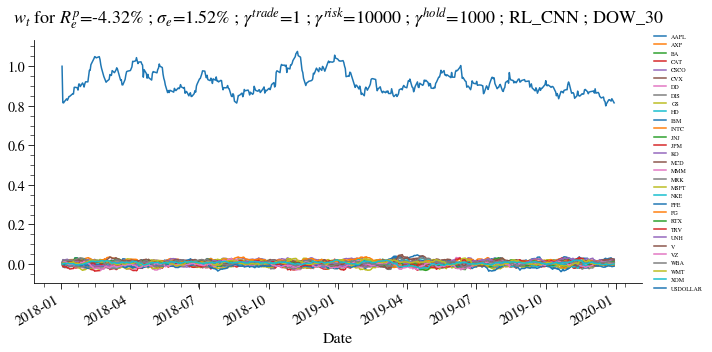

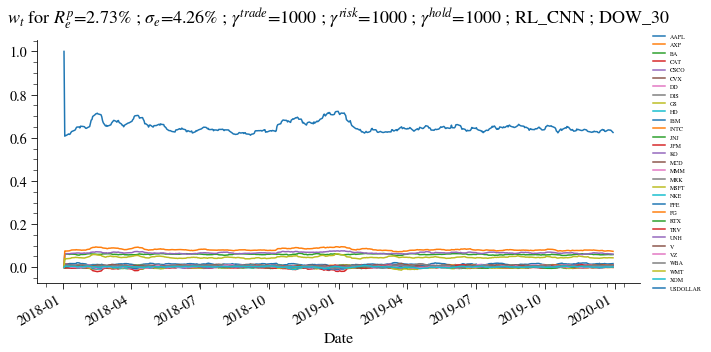

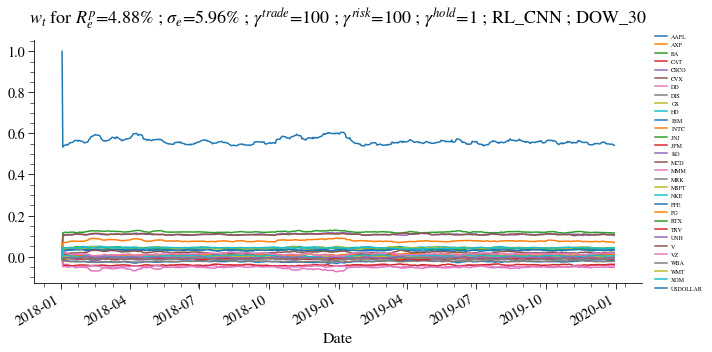

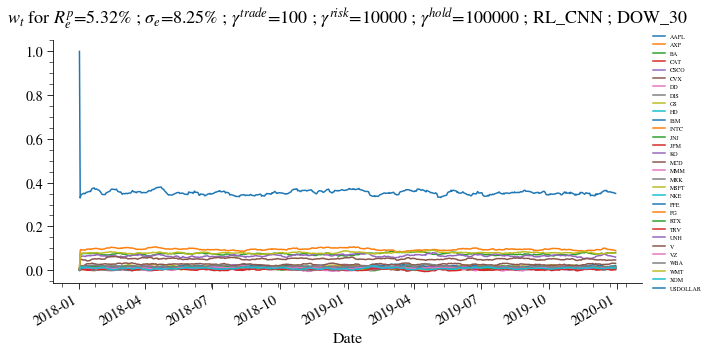

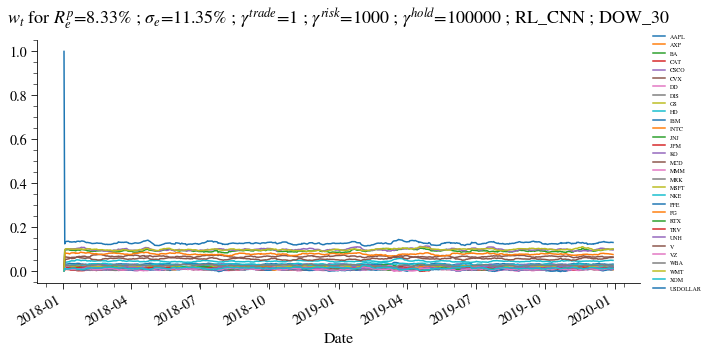

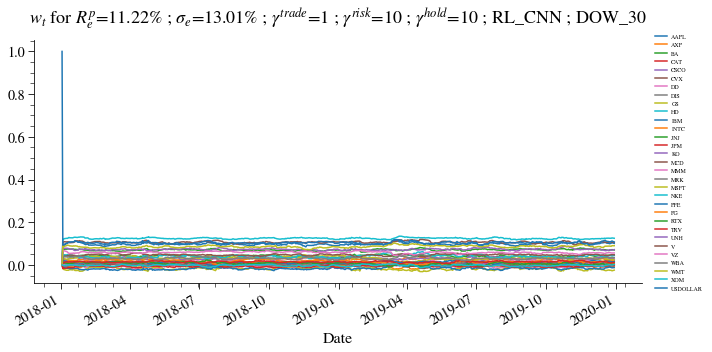

In [11]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])
        GAMMA_HOLD = make_int(result['gamma_hold'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 gamma_hold=GAMMA_HOLD, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    '$\gamma^{hold}$='+f'{GAMMA_HOLD} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]', e)

In [12]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2018-01-03,0.089123,-0.002289,0.069345,0.020985,0.003271,-0.001531,-0.001263,-0.006443,-0.013187,0.121468,...,0.009078,0.013407,0.011966,0.074675,0.038817,0.068509,0.036397,0.087812,-0.001472,0.093499
2018-01-04,0.088036,-0.000981,0.070765,0.017874,0.006108,-0.004152,0.000966,-0.006720,-0.021124,0.120532,...,0.011387,0.009311,0.009603,0.076872,0.038333,0.066916,0.040535,0.083099,-0.002501,0.094162
2018-01-05,0.092344,-0.002933,0.073671,0.019283,0.004496,-0.004128,-0.001581,-0.008437,-0.022267,0.122928,...,0.009123,0.009171,0.012430,0.078027,0.039964,0.065946,0.037461,0.087116,-0.002775,0.096576
2018-01-08,0.100406,-0.006317,0.073879,0.018053,0.001260,-0.003831,-0.001649,-0.007987,-0.025335,0.124526,...,0.008834,0.008259,0.014410,0.077822,0.041403,0.062625,0.037889,0.090194,-0.000669,0.102048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.100682,-0.005621,0.067240,0.018348,0.000623,-0.004629,0.000845,0.004154,-0.024028,0.125212,...,0.008171,0.002381,0.010455,0.068870,0.044744,0.057373,0.034113,0.087878,0.000769,0.109111
2019-12-24,0.099214,-0.004917,0.070209,0.019594,0.002349,-0.006582,-0.001019,0.003745,-0.025285,0.124743,...,0.007087,0.002569,0.009681,0.071054,0.045958,0.057923,0.034143,0.088201,0.000919,0.107489
2019-12-26,0.101725,-0.004743,0.070076,0.016575,0.001219,-0.004531,-0.001528,0.003977,-0.025206,0.124793,...,0.009062,0.003137,0.009561,0.070052,0.046971,0.056071,0.033465,0.087196,-0.000569,0.109893


In [13]:
print('done.')

done.
